In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
import os

plt.style.use('seaborn-whitegrid')

In [2]:
sueldos = pd.read_excel('tabulador_pe2019.xls', header = 9)
sueldos.head()

,NIVEL,TIPO,PUESTO,SUELDO BASE,CUOTAS SEGURIDAD SOCIAL,PREVISIÓN SOCIAL,AYUDA X SERVICIOS,APOYO FAMILIAR,GRATIFICACIÓN QUINCENAL,SUELDO MENSUAL BRUTO,IMPTO MENSUAL,ISSEG,ISSSTE,SUELDO MENSUAL NETO,PRIMA VACACIONAL,AGUINALDO
0,22,NaN,GOBERNADOR/A DEL ESTADO,59804.327930,5843.07,1913.1,25897,64294.837780,75373.99,233126.325711,69584.321342,5082.66,760.41,157698.934369,10 Días por Año,45 Días por Año
1,20,NaN,SECRETARIO/A DE ESTADO A,49025.945517,5843.07,1913.1,22783,48858.839699,67187.62,195611.575216,56829.306173,5082.66,760.41,132939.199042,10 Días por Año,45 Días por Año
2,19,NaN,DIRECTOR/A GENERAL PARAESTATAL A,40685.951590,5843.07,1913.1,18805,41397.705456,49230.82,157875.647046,43999.090596,5082.66,760.41,108033.486450,10 Días por Año,45 Días por Año
3,19,NaN,SECRETARIO/A DE ESTADO B,40685.951590,5843.07,1913.1,18805,41397.705456,49230.82,157875.647046,43999.090596,5082.66,760.41,108033.486450,10 Días por Año,45 Días por Año
4,18,NaN,SECRETARIO/A DE ESTADO C,37083.708634,5843.07,1913.1,16756,35924.238404,42651.90,140172.017038,37979.856393,5082.66,760.41,96349.090645,10 Días por Año,45 Días por Año


#### <strong>1. ¿Cuál es promedio de las contribuciones del sueldo de un trabajador en esta dependencia? </strong> 

In [3]:
sueldos['SUELDO MENSUAL BRUTO'].mean()

49467.37593510606

In [4]:
sueldos['SUELDO MENSUAL NETO'].mean()

35829.35357437967

#### <strong>2. Media y moda de las contribuciones del sueldo de un trabajador. Rango interquartil de la distribución.</strong> 

<strong>Moda</strong>

In [5]:
sueldos['SUELDO MENSUAL BRUTO'].mode()

0     9783.850296
1    11440.563407
dtype: float64

In [6]:
sueldos['SUELDO MENSUAL NETO'].mode()

0    8294.835952
1    9609.786902
dtype: float64

<strong>Mediana</strong>

In [7]:
sueldos['SUELDO MENSUAL BRUTO'].median()

28148.204515722646

In [8]:
sueldos['SUELDO MENSUAL NETO'].median()

22078.22528193275

<strong>Rangos intercuartiles</strong>

In [9]:
sueldos['SUELDO MENSUAL BRUTO'].quantile(0.25)

12353.567027836678

In [10]:
sueldos['SUELDO MENSUAL BRUTO'].quantile(0.5)

28148.204515722646

In [11]:
sueldos['SUELDO MENSUAL BRUTO'].quantile(0.75)

70240.8175237125

En las tablas siguientes pueden observarse los datos mostrados anteriormente para el <strong>sueldo mensual bruto, sueldo mensual neto</strong>.

In [12]:
sueldos.describe()['SUELDO MENSUAL BRUTO']

count        79.000000
mean      49467.375935
std       48932.415025
min        7616.508000
25%       12353.567028
50%       28148.204516
75%       70240.817524
max      233126.325711
Name: SUELDO MENSUAL BRUTO, dtype: float64

In [13]:
sueldos.describe()['SUELDO MENSUAL NETO']

count        79.000000
mean      35829.353574
std       32902.782725
min        6751.946368
25%       10289.592141
50%       22078.225282
75%       50363.213596
max      157698.934369
Name: SUELDO MENSUAL NETO, dtype: float64

La línea siguiente no es parte de la información solicitada, únicamente es para agregar al reporte.

In [14]:
print(sueldos.describe()['SUELDO MENSUAL NETO'].loc['25%' : '75%'].to_latex())

\begin{tabular}{lr}
\toprule
{} &  SUELDO MENSUAL NETO \\
\midrule
25\% &         10289.592141 \\
50\% &         22078.225282 \\
75\% &         50363.213596 \\
\bottomrule
\end{tabular}



#### <strong>3. ¿Cuál es la dispersión de sueldos?</strong> 

Para el <strong>sueldo mensual neto,</strong> que es el que resulta relevante para el análisis se obtuvo la siguiente dispersión en el sueldo.

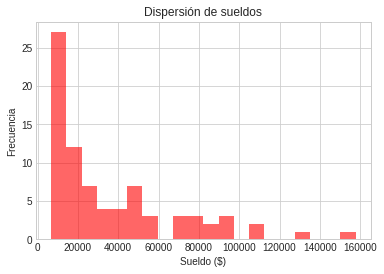

In [15]:
plt.hist(sueldos['SUELDO MENSUAL NETO'], bins = 20, alpha = 0.6, color = 'red')
plt.title('Dispersión de sueldos')
plt.xlabel('Sueldo ($)')
plt.ylabel('Frecuencia')
plt.savefig('Dispersion.png')
plt.show()

Compare las siguientes magnitudes:

In [16]:
media = sueldos['SUELDO MENSUAL NETO'].mean()
mediana = sueldos['SUELDO MENSUAL NETO'].median()
moda = sueldos['SUELDO MENSUAL NETO'].mode()

m = pd.DataFrame({'Media' : media, 'Mediana' : mediana, 'Moda' : moda})
m

,Media,Mediana,Moda
0,35829.353574,22078.225282,8294.835952
1,35829.353574,22078.225282,9609.786902


Observe que existen <strong>dos valores con mayor frecuencia</strong>, y claramente sólo existe <strong>mediana, media</strong>. Por la posición en la que se encuentra cada valor, se considera conveniente analizar la dispersión respecto a la mediana por lo que se muestra a continuación una diferencia entre cada uno de los sueldos y la mediana $(\tilde{x})$; $\delta x = \mid sueldo$ $mensual$ $neto$ $- \tilde{x} \mid$.

In [17]:
#Dispersión con respecto a la mediana.
x = pd.DataFrame({'Puesto' : sueldos['PUESTO'], 'SUELDO MENSUAL NETO' : sueldos['SUELDO MENSUAL NETO'], '$\delta x$' : np.abs(sueldos['SUELDO MENSUAL NETO'] - mediana)})
x.head()

,Puesto,SUELDO MENSUAL NETO,$\delta x$
0,GOBERNADOR/A DEL ESTADO,157698.934369,135620.709087
1,SECRETARIO/A DE ESTADO A,132939.199042,110860.973760
2,DIRECTOR/A GENERAL PARAESTATAL A,108033.486450,85955.261168
3,SECRETARIO/A DE ESTADO B,108033.486450,85955.261168
4,SECRETARIO/A DE ESTADO C,96349.090645,74270.865363


Para observar la dispersión, se consideran nuevamente los cuartiles. Ésto sirve porque a partir del valor de la media, se pueden realizar conclusiones acerca de los sueldos.

<o1 >
<li>>> Hasta el <strong>25%</strong> de los trabajadores tiene el primer sueldos,</li>
<li>>> hasta el <strong>50%</strong> tiene el segundo sueldo y</li>
<li>>> hasta el <strong>75%</strong> tiene el tercer sueldo.</li>
</o1>

In [18]:
sueldos['SUELDO MENSUAL NETO'].describe()['25%' : '75%']

25%    10289.592141
50%    22078.225282
75%    50363.213596
Name: SUELDO MENSUAL NETO, dtype: float64

Una forma de representar los datos haciendo uso únicamente de los cuartiles:

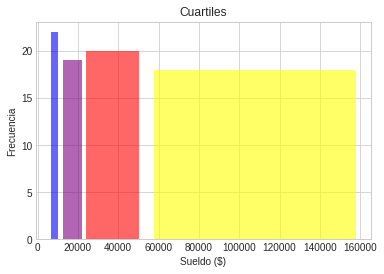

CUARTIL 1: Número de trabajadores con menor sueldo a  10289.592141252884 :  22
CUARTIL 2: Número de trabajadores con sueldo entre [ 10289.592141252884 ,  22078.22528193275 ]:  19
CUARTIL 3: Número de trabajadores con sueldo entre [ 22078.22528193275 ,  50363.2135957455 ]:  20
CUARTIL 4: Número de trabajadores con sueldo mayor a  50363.2135957455 :  18


In [19]:
bin1 = sueldos[sueldos['SUELDO MENSUAL NETO'] <= sueldos['SUELDO MENSUAL NETO'].quantile(.25)]
bin2 = sueldos[(sueldos['SUELDO MENSUAL NETO'] <= sueldos['SUELDO MENSUAL NETO'].quantile(.5)) & 
               (sueldos['SUELDO MENSUAL NETO'] > sueldos['SUELDO MENSUAL NETO'].quantile(.25))]
bin3 = sueldos[(sueldos['SUELDO MENSUAL NETO'] <= sueldos['SUELDO MENSUAL NETO'].quantile(.75)) & 
               (sueldos['SUELDO MENSUAL NETO'] > sueldos['SUELDO MENSUAL NETO'].quantile(.5))]
bin4 = sueldos[sueldos['SUELDO MENSUAL NETO'] > sueldos['SUELDO MENSUAL NETO'].quantile(.75)]

plt.hist(bin1['SUELDO MENSUAL NETO'], bins = 1, color = 'blue', alpha = 0.6)
plt.hist(bin2['SUELDO MENSUAL NETO'], bins = 1, color = 'purple', alpha = 0.6)
plt.hist(bin3['SUELDO MENSUAL NETO'], bins = 1, color = 'red', alpha = 0.6)
plt.hist(bin4['SUELDO MENSUAL NETO'], bins = 1, color = 'yellow', alpha = 0.6)
plt.title('Cuartiles')
plt.xlabel('Sueldo ($)')
plt.ylabel('Frecuencia')
plt.savefig('Cuartiles.png')
plt.show()
print('CUARTIL 1: Número de trabajadores con menor sueldo a ', sueldos['SUELDO MENSUAL NETO'].quantile(.25), ': ', len(bin1['SUELDO MENSUAL NETO']))
print('CUARTIL 2: Número de trabajadores con sueldo entre [', sueldos['SUELDO MENSUAL NETO'].quantile(.25), ', ', sueldos['SUELDO MENSUAL NETO'].quantile(.5), ']: ', len(bin2['SUELDO MENSUAL NETO']))
print('CUARTIL 3: Número de trabajadores con sueldo entre [', sueldos['SUELDO MENSUAL NETO'].quantile(.5), ', ', sueldos['SUELDO MENSUAL NETO'].quantile(.75), ']: ', len(bin3['SUELDO MENSUAL NETO']))
print('CUARTIL 4: Número de trabajadores con sueldo mayor a ', sueldos['SUELDO MENSUAL NETO'].quantile(.75), ': ', len(bin4['SUELDO MENSUAL NETO']))

Respecto a $\tilde{x}$, $\sigma, 2 \sigma$:

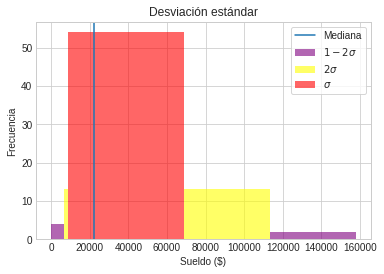

In [28]:
sig1_1 = sueldos['SUELDO MENSUAL NETO'].quantile(.16)
sig1_2 = sueldos['SUELDO MENSUAL NETO'].quantile(.84)
sig2_1 = sueldos['SUELDO MENSUAL NETO'].quantile(0.02)
sig2_2 = sueldos['SUELDO MENSUAL NETO'].quantile(.977)
sig3_1 = sueldos['SUELDO MENSUAL NETO'].quantile(1)

plt.hist(sueldos['SUELDO MENSUAL NETO'], bins = 1, range = [0, sig2_1], color = 'purple', alpha = 0.6, label = '$1 - 2\sigma$')
plt.hist(sueldos['SUELDO MENSUAL NETO'], bins = 1, range = [sig2_1, sig1_1], color = 'yellow', alpha = 0.6, label = '$2 \sigma$')
plt.hist(sueldos['SUELDO MENSUAL NETO'], bins = 1, range = [sig1_1, sig1_2], color = 'red', alpha = 0.6, label = '$\sigma$')
plt.hist(sueldos['SUELDO MENSUAL NETO'], bins = 1, range = [sig1_2, sig2_2], color = 'yellow', alpha = 0.6)
plt.hist(sueldos['SUELDO MENSUAL NETO'], bins = 1, range = [sig2_2, sig3_1], color = 'purple', alpha = 0.6)
plt.axvline(mediana, label = 'Mediana')
plt.title('Desviación estándar')
plt.xlabel('Sueldo ($)')
plt.ylabel('Frecuencia')
plt.legend(frameon = True)
plt.savefig('Sigma.png')
plt.show()

#### <strong>4. ¿Cuál es el sueldo base máximo?</strong>

Considerando el <strong>sueldo mensual neto,</strong> que es el que reciben los trabajadores:

In [89]:
#Trabajando con el sueldo mensual neto:
sueldos['SUELDO MENSUAL NETO'].max()

157698.9343690769

#### <strong>5. ¿Cuál es el sueldo base mínimo?</strong>

Considerando el <strong>sueldo mensual neto,</strong> que es el que reciben los trabajadores:

In [90]:
#Trabajando con el sueldo mensual neto:
sueldos['SUELDO MENSUAL NETO'].min()

6751.946368

#### <strong>6. Porcentaje relativo de cada una de las componentes del sueldo mensual neto en cada uno de los puestos </strong>

In [49]:
sueldos.keys()

Index(['NIVEL', 'TIPO', 'PUESTO', 'SUELDO BASE', 'CUOTAS SEGURIDAD SOCIAL',
       'PREVISIÓN SOCIAL', 'AYUDA X SERVICIOS', 'APOYO FAMILIAR',
       'GRATIFICACIÓN QUINCENAL', 'SUELDO MENSUAL BRUTO', 'IMPTO MENSUAL',
       'ISSEG', 'ISSSTE', 'SUELDO MENSUAL NETO', 'PRIMA VACACIONAL',
       'AGUINALDO'],
      dtype='object')

A continuación se muestran los porcentajes de cada uno de los puestos con respecto al <strong>sueldo mensual neto</strong>.

In [65]:
#Pendiente
p = ['PUESTO', 'SUELDO BASE', 'CUOTAS SEGURIDAD SOCIAL', 'PREVISIÓN SOCIAL', 'AYUDA X SERVICIOS',
            'APOYO FAMILIAR', 'GRATIFICACIÓN QUINCENAL', 'SUELDO MENSUAL BRUTO', 'IMPTO MENSUAL', 'ISSEG',
            'ISSSTE', 'SUELDO MENSUAL NETO']
Porcentaje = pd.DataFrame({'PUESTO' : sueldos[p[0]]})

#No es posible realizar la acción siguiente con un ciclo.
Porcentaje[p[1]] = sueldos[p[1]] / sueldos[p[11]]
Porcentaje[p[2]] = sueldos[p[2]] / sueldos[p[11]]
Porcentaje[p[3]] = sueldos[p[3]] / sueldos[p[11]]
Porcentaje[p[4]] = sueldos[p[4]] / sueldos[p[11]]
Porcentaje[p[5]] = sueldos[p[5]] / sueldos[p[11]]
Porcentaje[p[6]] = sueldos[p[6]] / sueldos[p[11]]
Porcentaje[p[7]] = sueldos[p[7]] / sueldos[p[11]]
Porcentaje[p[8]] = sueldos[p[8]] / sueldos[p[11]]
Porcentaje[p[9]] = sueldos[p[9]] / sueldos[p[11]]
Porcentaje[p[10]] = sueldos[p[10]] / sueldos[p[11]]

Porcentaje.head()

,PUESTO,SUELDO BASE,CUOTAS SEGURIDAD SOCIAL,PREVISIÓN SOCIAL,AYUDA X SERVICIOS,APOYO FAMILIAR,GRATIFICACIÓN QUINCENAL,SUELDO MENSUAL BRUTO,IMPTO MENSUAL,ISSEG,ISSSTE
0,GOBERNADOR/A DEL ESTADO,0.379231,0.037052,0.012131,0.164218,0.407706,0.477961,1.478300,0.441248,0.032230,0.004822
1,SECRETARIO/A DE ESTADO A,0.368785,0.043953,0.014391,0.171379,0.367528,0.505401,1.471436,0.427483,0.038233,0.005720
2,DIRECTOR/A GENERAL PARAESTATAL A,0.376605,0.054086,0.017708,0.174066,0.383193,0.455700,1.461358,0.407273,0.047047,0.007039
3,SECRETARIO/A DE ESTADO B,0.376605,0.054086,0.017708,0.174066,0.383193,0.455700,1.461358,0.407273,0.047047,0.007039
4,SECRETARIO/A DE ESTADO C,0.384889,0.060645,0.019856,0.173909,0.372855,0.442681,1.454835,0.394190,0.052753,0.007892


#### <strong>7. ¿De cuánto dinero es la diferencia entre el sueldo neto mayor (gobernador del estado) y el sueldo de otros empleados (por ejemplo, alguien de nivel 1, que es el nivel más bajo en la tabla)?</strong>

In [7]:
Diferencia = pd.DataFrame({"Puesto" : sueldos['PUESTO'], "Diferencia" : 
                           np.abs(sueldos['SUELDO MENSUAL NETO'] - sueldos['SUELDO MENSUAL NETO'].max())})
Diferencia.head()

,Puesto,Diferencia
0,GOBERNADOR/A DEL ESTADO,0.000000
1,SECRETARIO/A DE ESTADO A,24759.735327
2,DIRECTOR/A GENERAL PARAESTATAL A,49665.447919
3,SECRETARIO/A DE ESTADO B,49665.447919
4,SECRETARIO/A DE ESTADO C,61349.843724


#### <strong>8. ¿Qué porcentaje se da de apoyo en sus diferentes modalidades para cada uno? </strong>

Considerando apoyos las columnas <strong>CUOTAS SEGURIDAD SOCIAL, PREVISIÓN SOCIAL, AYUDA X SERVICIOS, APOYO FAMILIAR y GRATIFICACIÓN QUINCENAL,</strong> se tiene lo siguiente:

In [30]:
apoyos = sueldos['CUOTAS SEGURIDAD SOCIAL'] + sueldos['PREVISIÓN SOCIAL'] + sueldos['AYUDA X SERVICIOS'] + sueldos['APOYO FAMILIAR'] + sueldos['GRATIFICACIÓN QUINCENAL']

Apoyo = pd.DataFrame({"Puesto" : sueldos['PUESTO'], "Sueldo mensual neto" : sueldos['SUELDO MENSUAL NETO'], 
                      "Apoyos" : apoyos, "Porcentaje" : apoyos / sum(apoyos)})
Apoyo.head()

,Puesto,Sueldo mensual neto,Apoyos,Porcentaje
0,GOBERNADOR/A DEL ESTADO,157698.934369,173321.997780,0.062613
1,SECRETARIO/A DE ESTADO A,132939.199042,146585.629699,0.052954
2,DIRECTOR/A GENERAL PARAESTATAL A,108033.486450,117189.695456,0.042335
3,SECRETARIO/A DE ESTADO B,108033.486450,117189.695456,0.042335
4,SECRETARIO/A DE ESTADO C,96349.090645,103088.308404,0.037241


#### <strong>9. ¿Cuánto dinero es utilizado en ISSSTE entre todos los puestos?</strong>

In [31]:
sueldos['ISSSTE'].sum() + sueldos['ISSEG'].sum()

201533.50335585803

El porcentaje de recursos invertido en cada puesto es:

In [33]:
issste = pd.DataFrame({'Puesto' : sueldos['PUESTO'], 'ISSSTE' : sueldos['ISSSTE'], 'Porcentaje' : sueldos['ISSSTE'] / sueldos['ISSSTE'].sum()})
issste.head()

,Puesto,ISSSTE,Porcentaje
0,GOBERNADOR/A DEL ESTADO,760.41,0.025854
1,SECRETARIO/A DE ESTADO A,760.41,0.025854
2,DIRECTOR/A GENERAL PARAESTATAL A,760.41,0.025854
3,SECRETARIO/A DE ESTADO B,760.41,0.025854
4,SECRETARIO/A DE ESTADO C,760.41,0.025854


In [48]:
issste['ISSSTE'].sum()

29411.26871446277

In [72]:
np.where(sueldos['SUELDO MENSUAL NETO'] == sueldos['SUELDO MENSUAL NETO'].min())

(array([75, 76, 77, 78]),)